# Coupon Collector's Problem

https://en.wikipedia.org/wiki/Coupon_collector%27s_problem

In [1]:
import random
import math
from statistics import mean, stdev

import matplotlib.pyplot as plt


def expectancy_analytical(n: int) -> float:
    return n * sum(1./i for i in range(1, n+1))


def stdev_analytical_bound(n: int) -> float:
    return math.pi / math.sqrt(6) * n


def ccp_run(n: int) -> int:
    coupons_missing = set(range(n))
    tries = 0
    while coupons_missing:
        sampled = random.randrange(n)
        if sampled in coupons_missing:
            coupons_missing.remove(sampled)
        tries += 1
    return tries


def get_mean_stdev(n: int, n_runs: int) -> tuple:
    runs = [ccp_run(n) for _ in range(n_runs)]
    return mean(runs), stdev(runs)

In [2]:
N = 10_000
n = 8
mean8, stdev8 = get_mean_stdev(n, N)
print(f"Experiment: {mean8} +- {stdev8}")
print(f"Analytical: {expectancy_analytical(n)} +- {stdev_analytical_bound(n)}")

Experiment: 21.6351 +- 8.66832521172329
Analytical: 21.74285714285714 +- 10.260398641294913


Simulating for many $n$

In [3]:
n_range = range(3, 50)
means, stdevs = zip(*[get_mean_stdev(n, N) for n in n_range])

In [4]:
means_analytical = [expectancy_analytical(n) for n in n_range]
stdevs_analytical = [stdev_analytical_bound(n) for n in n_range]

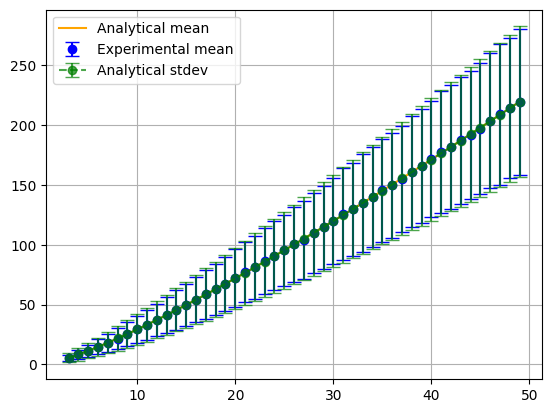

In [5]:
import matplotlib.pyplot as plt

plt.errorbar(
    n_range,
    means,
    yerr=stdevs,
    fmt="o",
    label="Experimental mean",
    color="blue",
    capsize=5,
)

plt.plot(n_range, means_analytical, label="Analytical mean", color="orange")

plt.errorbar(
    n_range,
    means_analytical,
    yerr=stdevs_analytical,
    fmt="o",
    label="Analytical stdev",
    color="green",
    linestyle="--",
    alpha=0.7,
    capsize=5,
)

plt.legend()
plt.grid()
plt.show()
